## Ex1 Use data from Danmarks Statistik - Databanken
1. Go to https://www.dst.dk/da/Statistik/brug-statistikken/muligheder-i-statistikbanken/api#testkonsol
2. Open 'Konsol' and click 'Start Konsol'
3. In the console at pt 1: choose 'Retrieve tables', pt 2: choose get request and json format and pt 3: execute:
  1. check the result
  2. in the code below this same get request is used to get information about all available data tables in 'databanken'. 
4. Change pt. 1 in the console to 'Retrieve data', pt 2: 'get request' and Table id: 'FOLK1A', format: csv, delimiter: semicolon and click: 'Variable and value codes' and choose some sub categories (Hint: hover over the codes to see their meaning). Finally execute and see what data you get.
5. With data aggregation and data visualization answer the following questions:
  1. What is the change in pct of divorced danes from 2008 to 2020?
  2. Which of the 5 biggest cities has the highest percentage of 'Never Married' in 2020?
  3. Show a bar chart of changes in marrital status in Copenhagen from 2008 till now
  4. Show 2 plots in same figure: 'Married' and 'Never Married' for all ages in DK in 2020 (Hint: x axis is age from 0-125, y axis is how many people in the 2 categories). Add lengend to show names on graphs

## 1 - 4)

In [258]:
import pandas as pd
df = pd.read_csv('https://api.statbank.dk/v1/data/FOLK1A/CSV?lang=en&delimiter=Semicolon&OMR%C3%85DE=*&K%C3%98N=1%2C2&CIVILSTAND=U%2CG%2CE%2CF&Tid=*', sep=';' )
df

,OMRÅDE,KØN,CIVILSTAND,TID,INDHOLD
0,All Denmark,Men,Never married,2008Q1,1366147
1,All Denmark,Men,Never married,2008Q2,1371341
2,All Denmark,Men,Never married,2008Q3,1372281
3,All Denmark,Men,Never married,2008Q4,1374057
4,All Denmark,Men,Never married,2009Q1,1377636
...,...,...,...,...,...
49555,Aalborg,Women,Divorced,2021Q3,10437
49556,Aalborg,Women,Divorced,2021Q4,10446
49557,Aalborg,Women,Divorced,2022Q1,10506
49558,Aalborg,Women,Divorced,2022Q2,10552


## 5) With data aggregation and data visualization answer the following questions:

### 1. What is the change in pct of divorced danes from 2008 to 2020?

In [131]:
# Remove all Q1 - Q3 with this mask / query and remove All Denmark and regions
my_mask = df["TID"].str.contains('Q4') & ~df["OMRÅDE"].str.contains('All Denmark') & ~df["OMRÅDE"].str.contains('Region')
data = df.query("@my_mask").reset_index()


#Remove Q4 from time
data['TID']= data['TID'].str.replace('Q4','')

data

,index,OMRÅDE,KØN,CIVILSTAND,TID,INDHOLD
0,947,Copenhagen,Men,Never married,2008,163881
1,951,Copenhagen,Men,Never married,2009,168085
2,955,Copenhagen,Men,Never married,2010,172699
3,959,Copenhagen,Men,Never married,2011,177134
4,963,Copenhagen,Men,Never married,2012,180899
...,...,...,...,...,...,...
11083,49540,Aalborg,Women,Divorced,2017,9951
11084,49544,Aalborg,Women,Divorced,2018,10120
11085,49548,Aalborg,Women,Divorced,2019,10131
11086,49552,Aalborg,Women,Divorced,2020,10315


In [132]:
# Find all data on Divorced people
divorced = data[data['CIVILSTAND'] == 'Divorced']

# Find year 2008
# divorced2008 = divorced[divorced['TID'] == '2008']

#divorced2008['INDHOLD'].sum()

In [133]:
# Filter out labels of interest
divorced = divorced.filter(['TID', 'INDHOLD'])
 
# Group the value according to a condition
newdf = divorced.groupby('TID').sum().reset_index()
newdf

,TID,INDHOLD
0,2008,432156
1,2009,439428
2,2010,447258
3,2011,455846
4,2012,466356
5,2013,477056
6,2014,500795
7,2015,513060
8,2016,526340
9,2017,535372


In [134]:
print(list(newdf.iloc[:,1]))

[432156, 439428, 447258, 455846, 466356, 477056, 500795, 513060, 526340, 535372, 542280, 543846, 552419, 558266]


In [135]:
difference = newdf.iloc[-2,1] - newdf.iloc[0,1] 
diffPercentage = (newdf.iloc[-2,1] / newdf.iloc[0,1]  - 1) * 100

print(f'{difference} more divorced people from 2008 to 2020 that is {int(diffPercentage)} % more')

120263 more divorced people from 2008 to 2020 that is 27 % more


### 2. Which of the 5 biggest cities has the highest percentage of 'Never Married' in 2020?

In [164]:
# Find all data on Never Married people
nm = data[(data['CIVILSTAND'] == 'Never married') & (data['TID'] == '2020')].reset_index()


# Filter out labels of interest
nm = nm.filter(['OMRÅDE', 'INDHOLD'])



# Group the value according to a condition
nm_result = nm.groupby('OMRÅDE').sum().sort_values(by=["INDHOLD"], ascending=False).reset_index()

nm_result.rename(columns={'INDHOLD': 'NEVER MARRIED'}, inplace=True, errors='raise')
nm_result.head()

,OMRÅDE,NEVER MARRIED
0,Copenhagen,417782
1,Aarhus,211863
2,Aalborg,120226
3,Odense,113639
4,Frederiksberg,61020


In [149]:
top5 = list(nm_result['OMRÅDE'].head())
top5

['Copenhagen', 'Aarhus', 'Aalborg', 'Odense', 'Frederiksberg']

In [165]:
# Find all data on top 5 areas
all_people = data[(data['OMRÅDE'].isin(top5)) & (data['TID'] == '2020')].reset_index()


# Filter out labels of interest
all_people = all_people.filter(['OMRÅDE', 'INDHOLD'])



# Group the value according to a condition
all_people_result = all_people.groupby('OMRÅDE').sum().sort_values(by=["INDHOLD"], ascending=False).reset_index()

all_people_result.rename(columns={'INDHOLD': 'ALL'}, inplace=True, errors='raise')
all_people_result

,OMRÅDE,ALL
0,Copenhagen,637936
1,Aarhus,353445
2,Aalborg,219310
3,Odense,205881
4,Frederiksberg,104351


In [169]:
# Merge the two tables together

top5_result = pd.merge(nm_result.head(), all_people_result)
top5_result

,OMRÅDE,NEVER MARRIED,ALL
0,Copenhagen,417782,637936
1,Aarhus,211863,353445
2,Aalborg,120226,219310
3,Odense,113639,205881
4,Frederiksberg,61020,104351


In [175]:
top5_result['PERCENTAGE'] = (top5_result['NEVER MARRIED']/top5_result['ALL'])*100
top5_result

,OMRÅDE,NEVER MARRIED,ALL,PERCENTAGE
0,Copenhagen,417782,637936,65.489642
1,Aarhus,211863,353445,59.942282
2,Aalborg,120226,219310,54.820118
3,Odense,113639,205881,55.196448
4,Frederiksberg,61020,104351,58.475721


### 3. Show a bar chart of changes in marrital status in Copenhagen from 2008 till now

In [235]:
# Find all data on top 5 areas
kbh = data[data['OMRÅDE'] == 'Copenhagen'].reset_index()


# Filter out labels of interest
kbh = kbh.filter(['CIVILSTAND', 'TID', 'INDHOLD'])

# Group the value according to a condition
kbh_result = kbh.groupby(['CIVILSTAND','TID']).sum().reset_index()

#kbh_result.rename(columns={'INDHOLD': 'ANTAL'}, inplace=True, errors='raise')

In [276]:
# explaination(ts_div): First we find all people that are divorced, 
# then we set the indexes to the years, and in the end we set the values for each year
ts_div = kbh_result.loc[kbh_result['CIVILSTAND']=='Divorced'].set_index('TID').loc[:, 'INDHOLD']
ts_ms = kbh_result.loc[kbh_result['CIVILSTAND']=='Married/separated'].set_index('TID').loc[:, 'INDHOLD']
ts_nm = kbh_result.loc[kbh_result['CIVILSTAND']=='Never married'].set_index('TID').loc[:, 'INDHOLD']
ts_wid = kbh_result.loc[kbh_result['CIVILSTAND']=='Widowed'].set_index('TID').loc[:, 'INDHOLD']

print(ts_div)

TID
2008    49836
2009    49633
2010    49662
2011    50062
2012    50270
2013    50511
2014    52260
2015    52919
2016    53807
2017    54336
2018    54623
2019    54682
2020    55063
2021    55305
Name: INDHOLD, dtype: int64


<AxesSubplot:title={'center':'København'}, xlabel='Year', ylabel='Antal'>

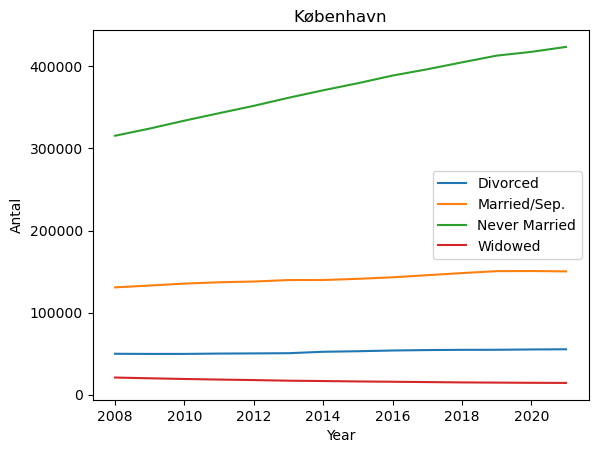

In [279]:
# CONCAT
ts = pd.concat([ts_div, ts_ms, ts_nm, ts_wid], axis=1,  keys=['Divorced', 'Married/Sep.', 'Never Married', 'Widowed']) # axis=0 is default (concats like sql UNION) axis=1 concats the data along the x axis

#ts
ts.plot(title='København', xlabel='Year', ylabel='Antal')

###  4. Show 2 plots in same figure: 'Married' and 'Never Married' for all ages in DK in 2020 (Hint: x axis is age from 0-125, y axis is how many people in the 2 categories). Add lengend to show names on graphs

In [ ]:
# I didnt add the age.. I thought we didnt need it..

## Ex2 Use another table (extra)
Choose any of the other tables in 'databanken' to find interesting data.
1. Collect the data
2. Pose 5 or more interesing questions to the data
3. Answer the questions by aggregating the data
4. Illustrate the answers with visual plots

In [1]:
import pandas as pd 
url = 'https://api.statbank.dk/v1/tables'
dst = pd.read_json(url)
dst.to_csv('dk-stat-all-tables.csv', encoding='utf-8', index=False)
dst[:20]

,id,text,unit,updated,firstPeriod,latestPeriod,active,variables
0,FOLK1A,Folketal den 1. i kvartalet,Antal,2022-08-11T08:00:00,2008K1,2022K3,True,"[område, køn, alder, civilstand, tid]"
1,FOLK1AM,Folketal den 1. i måneden,Antal,2022-09-07T08:00:00,2021M10,2022M08,True,"[område, køn, alder, tid]"
2,FOLK3,Folketal 1. januar,Antal,2022-02-11T08:00:00,2008,2022,True,"[fødselsdag, fødselsmåned, fødselsår, tid]"
3,FOLK3FOD,Folketal 1. januar,Antal,2022-03-18T08:00:00,2008,2022,True,"[fødselsdag, fødselsmåned, fødeland, tid]"
4,BEF5,Folketal pr. 1. januar,Antal,2022-02-11T08:00:00,1990,2022,True,"[køn, alder, fødeland, tid]"
5,FT,Folketal (summariske tal fra folketællinger),Antal,2022-02-11T08:00:00,1769,2022,True,"[hovedlandsdele, tid]"
6,BY1,Folketal 1. januar,Antal,2022-05-27T08:00:00,2010,2022,True,"[byområder og landdistrikter, alder, køn, tid]"
7,BY2,Folketal 1. januar,Antal,2022-05-27T08:00:00,2010,2022,True,"[kommune, bystørrelse, alder, køn, tid]"
8,BY3,Folketal 1. januar,-,2022-07-14T08:00:00,2017,2022,True,"[byområder og landdistrikter, folketal, areal ..."
9,KM1,Folketal den 1. i kvartalet,Antal,2022-08-11T08:00:00,2007K1,2022K3,True,"[sogn, folkekirkemedlemsskab, tid]"


In [2]:
pd.read_csv('https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&OMR%C3%85DE=*&K%C3%98N=1%2C2&ALDER=*&CIVILSTAND=U%2CG&Tid=2020K4',sep=';')

,OMRÅDE,KØN,ALDER,CIVILSTAND,TID,INDHOLD
0,Hele landet,Mænd,I alt,Ugift,2020K4,1520367
1,Hele landet,Mænd,I alt,Gift/separeret,2020K4,1072984
2,Hele landet,Mænd,0 år,Ugift,2020K4,31397
3,Hele landet,Mænd,0 år,Gift/separeret,2020K4,0
4,Hele landet,Mænd,1 år,Ugift,2020K4,31786
...,...,...,...,...,...,...
53335,Aalborg,Kvinder,123 år,Gift/separeret,2020K4,0
53336,Aalborg,Kvinder,124 år,Ugift,2020K4,0
53337,Aalborg,Kvinder,124 år,Gift/separeret,2020K4,0
53338,Aalborg,Kvinder,125 år,Ugift,2020K4,0
